# Heatmap (Mapa de Calor)
Es un gráfico X vs Y con dos usos diferentes dependiendo del tipo de las variables en los ejes.   


**Si las dos variables son numéricas**: El heatmap es una matriz que representa como se distribuyen las dos variables viendolas como un par de puntos. Es decir, que par de valores (x, y) tiene una mayor o menor frecuencia. Lo podemos ver como un Scatter Plot agrupado en cuadrículas equidistantes. En donde una cuadrícula con una tonalidad mas oscura me indica que existen mas de esos pares de puntos (x, y) dentro de esa cuadrícula. Y una cuadrícula con una tonalidad mas clara me indica que existen menos pares de puntos (x, y) dentro de esa cuadrícula. Por lo general, se lo utiliza cuando tengo un Scatter Plot con demasiados puntos o cuando quiero tener información sobre la distribución de las variables como un par. Y no individualmente.   
**Otros nombres**: Si las cuadrículas son hexagonales, se le denomina Hexabin. Y la funcionalidad es la misma.
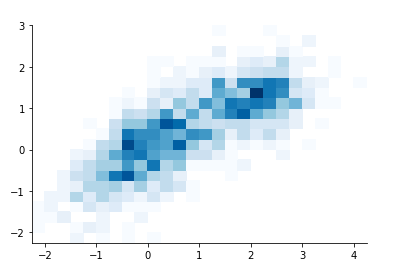


**Si las dos variables son categóricas y codifican una variable numérica**: El Heatmap es una matríz con tantas celdas como valores distintos categoricos tenga en X y en Y. Una celda con una tonalidad mas oscura me indica que el valor de ese punto X vs Y es mayor. **Ejemplos de Uso**: Como dueño de un supermercado me gustaria saber que tipo de productos se han vendido más en cuales supermercados. En este caso mi eje X serian los tipos de productos, mi eje Y serian los nombres de los supermercados, y la celda con su intensidad de color codificarian el valor de ventas de ese producto en ese supermercado.


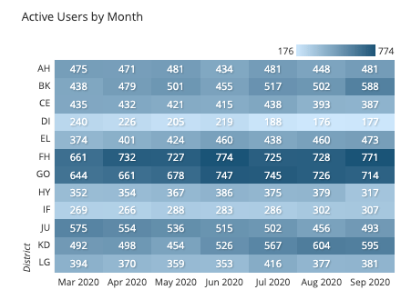

**Otros Nombres**: Existe algo denominado Heatmap de Correlaciones o Matriz de Correlación. En donde ambos ejes tienen nombres de variables (o columnas). Y la celda muestra el coeficiente de correlación entre esas dos variables.

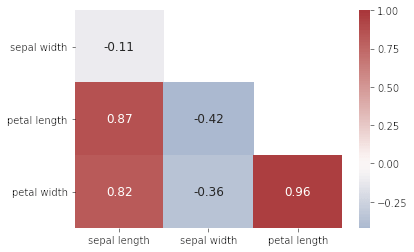


Otro ejemplo de un Heatmap seria el grafico del número de contribuciones de un usuario de Github. Rápidamente podemos ver que dias hemos hecho mas contribuciones. Es un gráfico muy intuitivo y útil para mostrar una cantidad grande de información de forma efectiva.

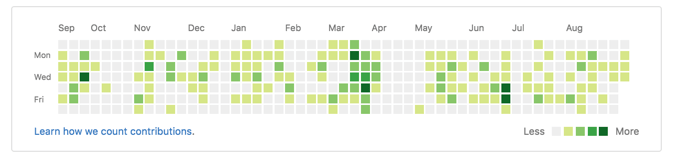


### Cuando utilizar
- Quiero observar la distribución de dos variables como un par de puntos.
- Quiero visualizar de forma intuitiva mucha información de una gran cantidad de categorías en un solo gráfico.

### Consejos
- Usualmente la tonalidad mas oscura representará un mayor valor.
- Es recomendable añadir una leyenda que muestre el significado de las tonalidades. Los rangos de valores que cada tonalidad codifica.
- Cuando utilizamos variables categóricas es común mostrar el valor que codifica la celda dentro de la celda.
- Es una alternativa cuando quiero hacer un gráfico de barras mùltiples, y tengo muchas categorias. Como el ejemplo que mencionamos. Si tengo muchos supermercados, o muchos tipos de productos diferentes. Un gráfico de barras sería demasiado denso.
- Si tengo muy pocos puntos en mi dataset, es preferible un scatter plot. O si tengo solo una o dos categorias es mejor un diagrama de barras.


## En esta clase
### Datos
Información sobre especies de pinguinos. E información sobre venta de tiendas
### Objetivos
1. Encontrar alguna correlación entre las características de los pinguinos
2. Mostrar diferencias de magnitud entre cuantos pinguinos viven en cuales islas
3. Hallar como ha sido la diferencia de ventas en las tiendas 3, 44, 45, 46, 47, 48, 49, 50 a lo largo de los meses

## Referencias
- https://datavizcatalogue.com/ES/metodos/mapa_de_calor.html
- https://chartio.com/learn/charts/heatmap-complete-guide/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
# Leemos los datos con Pandas
df = pd.read_csv('../data/pinguinos.csv')
df = df.dropna()
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Text(0.5, 1.0, 'Longitud de las Aletas vs Longitud del Pico en Pinguinos')

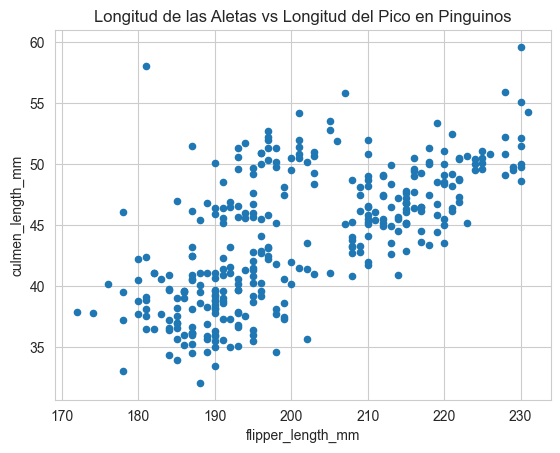

In [3]:
# Flipper lenght vs Culmen Lenght 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html
df.plot.scatter(
    x='flipper_length_mm',
    y='culmen_length_mm'
)
plt.title('Longitud de las Aletas vs Longitud del Pico en Pinguinos')

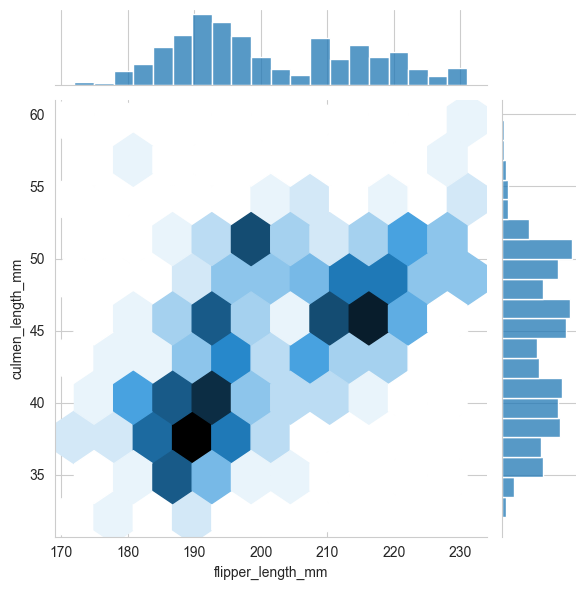

In [21]:
# Heatmap de datos numéricos
# https://seaborn.pydata.org/generated/seaborn.jointplot.html
sns.jointplot(
    data=df, 
    x='flipper_length_mm',
    y='culmen_length_mm',
    kind='hex', # hex
    joint_kws={
        'bins': 20,
        #'gridsize': 30 # Para hexabin
    },
    marginal_kws={
        "bins":20, 
        "fill":True
    },
    #cbar=True
    # gridsize=30  # Para hexabin
)
plt.show()

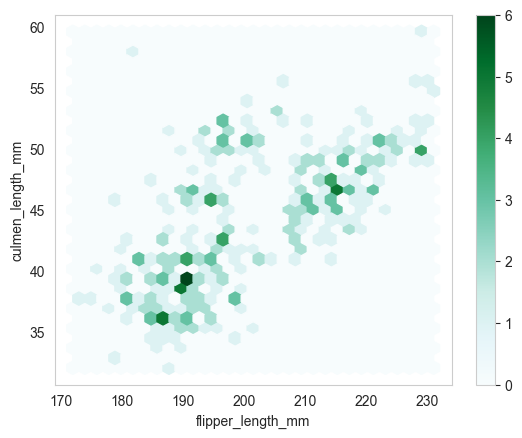

In [5]:
# Hexabin de datos numéricos
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hexbin.html
df.plot.hexbin(
    x='flipper_length_mm',
    y='culmen_length_mm',
    gridsize=30
)
plt.grid(False)
plt.show()

In [6]:
agrupado = df.groupby(['species', 'island']).count()[['sex']]
agrupado

sex
species   island        
Adelie    Biscoe      44
          Dream       55
          Torgersen   47
Chinstrap Dream       68
Gentoo    Biscoe     120

In [7]:
pivote = agrupado.unstack().droplevel(0, axis=1)
pivote

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44.0,55.0,47.0
Chinstrap,NaN,68.0,NaN
Gentoo,120.0,NaN,NaN


<AxesSubplot: xlabel='island', ylabel='species'>

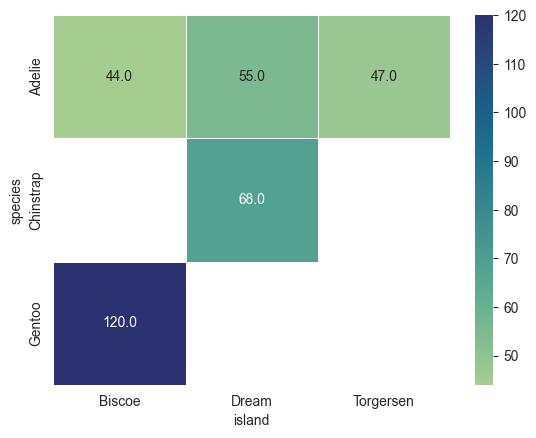

In [8]:
# Heatmap de variables categóricas que codifican una variable numérica
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(
    pivote,
    annot=True,
    cmap="crest",
    linewidth=0.5,
    fmt=".1f"
)

<AxesSubplot: >

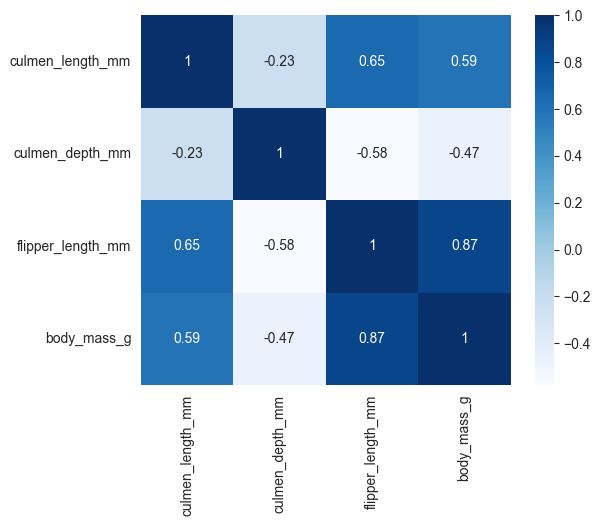

In [9]:
# Heatmap de Correlación
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Calculo los coeficientes de correlacion lineal entre mis variables
df_cor = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
sns.heatmap(
    df_cor,
    annot=True,
    cmap='Blues',
    square=True
)

palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()

In [10]:
df2 = pd.read_csv('../data/tienda_ventas.csv')
df2 = df2.dropna()
df2['periodo'] = df2['date'].apply(lambda x: x[:7])
df2

,id,date,store_nbr,family,sales,onpromotion,periodo
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0,2013-01
1,1,2013-01-01,1,BABY CARE,0.00000,0,2013-01
2,2,2013-01-01,1,BEAUTY,0.00000,0,2013-01
3,3,2013-01-01,1,BEVERAGES,0.00000,0,2013-01
4,4,2013-01-01,1,BOOKS,0.00000,0,2013-01
...,...,...,...,...,...,...,...
2161561,2161561,2016-04-30,9,POULTRY,826.35300,0,2016-04
2161562,2161562,2016-04-30,9,PREPARED FOODS,165.65399,0,2016-04
2161563,2161563,2016-04-30,9,PRODUCE,2012.72700,1,2016-04
2161564,2161564,2016-04-30,9,SCHOOL AND OFFICE SUPPLIES,10.00000,0,2016-04


In [11]:
tiendas_agrupadas = df2[(df2['family'] == 'BEVERAGES') & (df2['store_nbr'].isin([3, 44, 45, 46, 47, 48, 49, 50]))].groupby(['periodo', 'store_nbr']).agg({
    'sales': np.sum
})
tiendas_agrupadas

sales
periodo store_nbr          
2013-01 3          105918.0
        44         134704.0
        45          95337.0
        46          66554.0
        47          86696.0
...                     ...
2016-04 46         189725.0
        47         260209.0
        48         153519.0
        49         232772.0
        50         124670.0

[320 rows x 1 columns]

In [12]:
pivote2 = tiendas_agrupadas.unstack().droplevel(0, axis=1).transpose()
pivote2

periodo,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04
store_nbr,,,,,,,,,,,,,,,,,,,,,
3,105918.0,85944.0,110295.0,106450.0,104911.0,112178.0,101377.0,104993.0,115380.0,108865.0,...,248500.0,265434.0,290952.0,269803.0,260578.0,268735.0,276910.0,236641.0,251808.0,280338.0
44,134704.0,113249.0,141401.0,132401.0,129241.0,129758.0,116986.0,121577.0,134477.0,124148.0,...,269845.0,306903.0,335873.0,314323.0,294712.0,296869.0,308109.0,267233.0,282438.0,362065.0
45,95337.0,79642.0,103195.0,93776.0,93967.0,98994.0,86512.0,84388.0,94465.0,91376.0,...,239451.0,262088.0,269589.0,260236.0,270859.0,283491.0,285231.0,245660.0,255179.0,288155.0
46,66554.0,59986.0,74332.0,67487.0,68509.0,72126.0,63354.0,63395.0,74183.0,69787.0,...,173738.0,167830.0,189224.0,185181.0,185342.0,187011.0,185721.0,158185.0,166592.0,189725.0
47,86696.0,73934.0,94119.0,89860.0,92172.0,93244.0,76571.0,82500.0,98871.0,96628.0,...,226837.0,230120.0,269208.0,262587.0,252977.0,259226.0,264246.0,228110.0,238909.0,260209.0
48,46841.0,42221.0,54260.0,51336.0,49745.0,52146.0,45959.0,45772.0,55803.0,52305.0,...,136955.0,135547.0,154254.0,152713.0,146434.0,151458.0,152393.0,130522.0,137661.0,153519.0
49,63143.0,50398.0,67747.0,65548.0,66557.0,67011.0,58675.0,60753.0,73595.0,71828.0,...,193790.0,217076.0,256245.0,223401.0,213862.0,227158.0,220034.0,196393.0,209358.0,232772.0
50,42192.0,42662.0,46639.0,44828.0,46304.0,43228.0,41091.0,40785.0,44393.0,47299.0,...,114781.0,118580.0,120880.0,122375.0,123439.0,128996.0,126273.0,111851.0,112656.0,124670.0


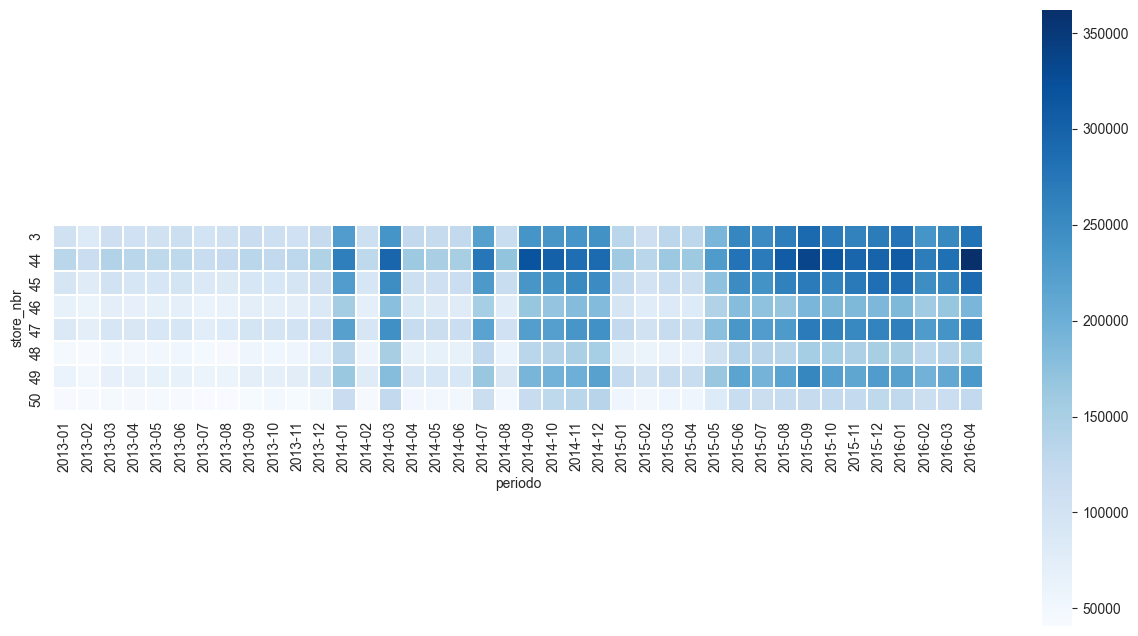

In [13]:
# Segundo ejemplo de un Heatmap de dos variables categóricas que codifican una variable numérica
plt.figure(figsize=(15, 8))
ax = sns.heatmap(
    pivote2,
    square=True, # Me genera cuadraditos simetricos
    cmap="Blues",
    linewidth=0.1,
)
plt.show()